In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,text,label
0,No está pasando nada genial. Adiós,0
1,"No lo haré. Entonces, ¿qué pasa con los chicos?",0
2,"Ok, k..sry, conozco 2 siva..tats y pregunté..",0
3,Dónde estás ? A qué te dedicas ? ¿Cómo puedes ...,0
4,¿Aún no has terminado de trabajar o algo así?,0


In [4]:
df_train[df_train["text"].isna()]

,text,label
865,NaN,0
2698,NaN,0


In [5]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [6]:
X_train = df_train.text
y_train = df_train.label
X_test = df_test.text
y_test = df_test.label

In [7]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"))

In [8]:
X_train = vectorizer.fit_transform(X_train)

In [9]:
from sklearn.svm import SVC

In [10]:
# Initialize and train the classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Predict on the test set
y_pred = clf.predict(vectorizer.transform(X_test))

In [13]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 98.83%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



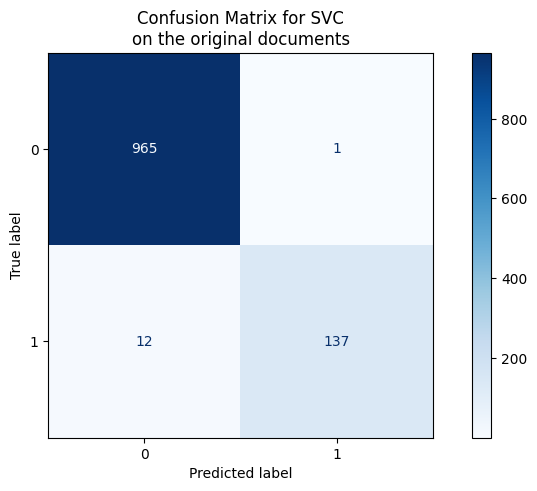

In [18]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay # C.M.

# target_names = newsgroups.target_names

fig, ax = plt.subplots(figsize=(10, 5))
# Se cambió el cmap de viridis a Blues. Este cmap es el más común en C.M.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
# ax.xaxis.set_ticklabels(target_names)
# ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)
plt.show()

---
Árboles de decisión

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
arbol_pred = arbol.predict(vectorizer.transform(X_test))

In [23]:
# Evaluate the performance
accuracy = accuracy_score(y_test, arbol_pred)
report = classification_report(y_test, arbol_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 96.59%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.91      0.83      0.87       149

    accuracy                           0.97      1115
   macro avg       0.94      0.91      0.92      1115
weighted avg       0.97      0.97      0.97      1115

